Bikram Rumba

MSCS-634-B01 Advanced Big Data and Data Mining

Regression Analysis with Regularization Techniques

In [1]:

# ============================================================================
# DATA PREPARATION
# ============================================================================

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("DATA PREPARATION")
print("="*80)

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Create a DataFrame for better exploration
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

print("\n1. Dataset Overview:")
print(f"   - Number of samples: {X.shape[0]}")
print(f"   - Number of features: {X.shape[1]}")
print(f"   - Feature names: {diabetes.feature_names}")

print("\n2. First few rows of the dataset:")
print(df.head())

print("\n3. Dataset statistics:")
print(df.describe())

print("\n4. Missing values check:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("\n   No missing values found in the dataset!")
else:
    print("\n   Missing values detected. Cleaning required.")

print("\n5. Target variable distribution:")
print(f"   - Mean: {y.mean():.2f}")
print(f"   - Std: {y.std():.2f}")
print(f"   - Min: {y.min():.2f}")
print(f"   - Max: {y.max():.2f}")

print("\n6. Data types:")
print(df.dtypes)

print("\n Data loaded and explored successfully!")
print("="*80)

DATA PREPARATION

1. Dataset Overview:
   - Number of samples: 442
   - Number of features: 10
   - Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

2. First few rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

3. Dataset statistics:
                age           sex           bmi            


STEP 2: SIMPLE LINEAR REGRESSION

Using feature: BMI (Body Mass Index)
Feature shape: (442, 1)

Training set size: 353 samples
Testing set size: 89 samples

 Model trained successfully!

--------------------------------------------------------------------------------
SIMPLE LINEAR REGRESSION RESULTS:
--------------------------------------------------------------------------------
Mean Absolute Error (MAE):        52.26
Mean Squared Error (MSE):         4061.83
Root Mean Squared Error (RMSE):   63.73
R² Score:                         0.2334
--------------------------------------------------------------------------------

Model Parameters:
   - Coefficient (slope):  998.58
   - Intercept:            152.00


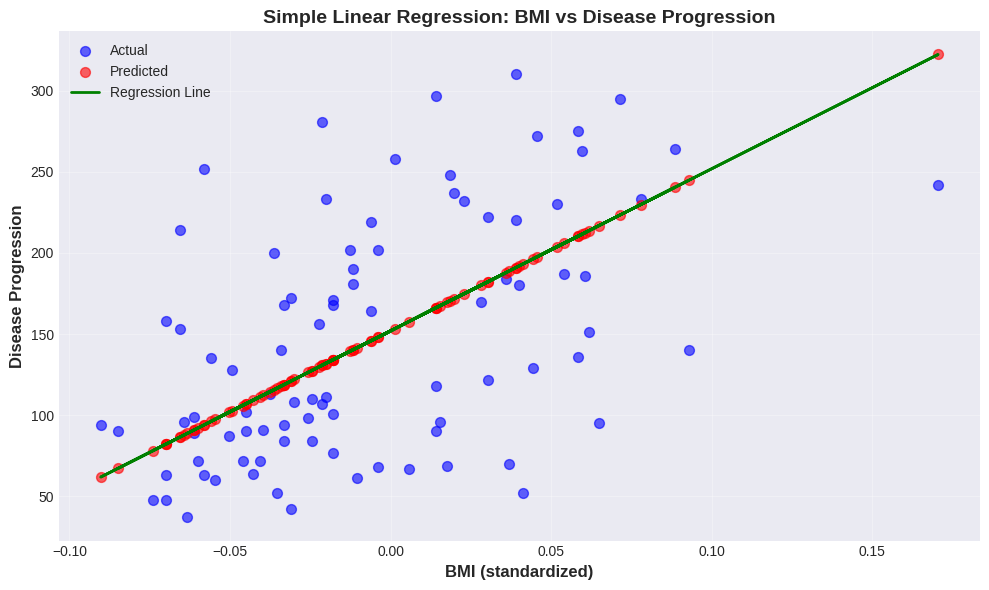


 Simple Linear Regression performed successfully!


In [2]:
print("\n" + "="*80)
print(" SIMPLE LINEAR REGRESSION")
print("="*80)

# Use BMI (body mass index) as the single feature for simple linear regression
# BMI is the 3rd feature (index 2)
X_simple = X[:, 2].reshape(-1, 1)
print(f"\nUsing feature: BMI (Body Mass Index)")
print(f"Feature shape: {X_simple.shape}")

# Split the data into training and testing sets (80% train, 20% test)
X_train_simple, X_test_simple, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train_simple.shape[0]} samples")
print(f"Testing set size: {X_test_simple.shape[0]} samples")

# Train the Simple Linear Regression model
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train)

print("\n Model trained successfully!")

# Make predictions on the test set
y_pred_simple = lr_simple.predict(X_test_simple)

# Calculate evaluation metrics
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("\n" + "-"*80)
print("SIMPLE LINEAR REGRESSION RESULTS:")
print("-"*80)
print(f"Mean Absolute Error (MAE):        {mae_simple:.2f}")
print(f"Mean Squared Error (MSE):         {mse_simple:.2f}")
print(f"Root Mean Squared Error (RMSE):   {rmse_simple:.2f}")
print(f"R² Score:                         {r2_simple:.4f}")
print("-"*80)
print(f"\nModel Parameters:")
print(f"   - Coefficient (slope):  {lr_simple.coef_[0]:.2f}")
print(f"   - Intercept:            {lr_simple.intercept_:.2f}")

# Visualize the model's predictions against actual data
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, alpha=0.6, label='Actual', color='blue', s=50)
plt.scatter(X_test_simple, y_pred_simple, alpha=0.6, label='Predicted', color='red', s=50)
plt.plot(X_test_simple, y_pred_simple, color='green', linewidth=2, label='Regression Line')
plt.xlabel('BMI (standardized)', fontweight='bold', fontsize=12)
plt.ylabel('Disease Progression', fontweight='bold', fontsize=12)
plt.title('Simple Linear Regression: BMI vs Disease Progression', fontweight='bold', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n Simple Linear Regression performed successfully!")
print("="*80)


MULTIPLE REGRESSION

Using all 10 features:
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Training set size: 353 samples
Testing set size: 89 samples

✓ Model trained successfully!

--------------------------------------------------------------------------------
MULTIPLE REGRESSION RESULTS:
--------------------------------------------------------------------------------
Mean Absolute Error (MAE):        42.79
Mean Squared Error (MSE):         2900.19
Root Mean Squared Error (RMSE):   53.85
R² Score:                         0.4526
--------------------------------------------------------------------------------

Model Parameters:
   - Intercept: 151.35

   Feature Coefficients:
      s1      :  -931.49
      s5      :   736.20
      bmi     :   542.43
      s2      :   518.06
      bp      :   347.70
      s4      :   275.32
      sex     :  -241.96
      s3      :   163.42
      s6      :    48.67
      age     :    37.90


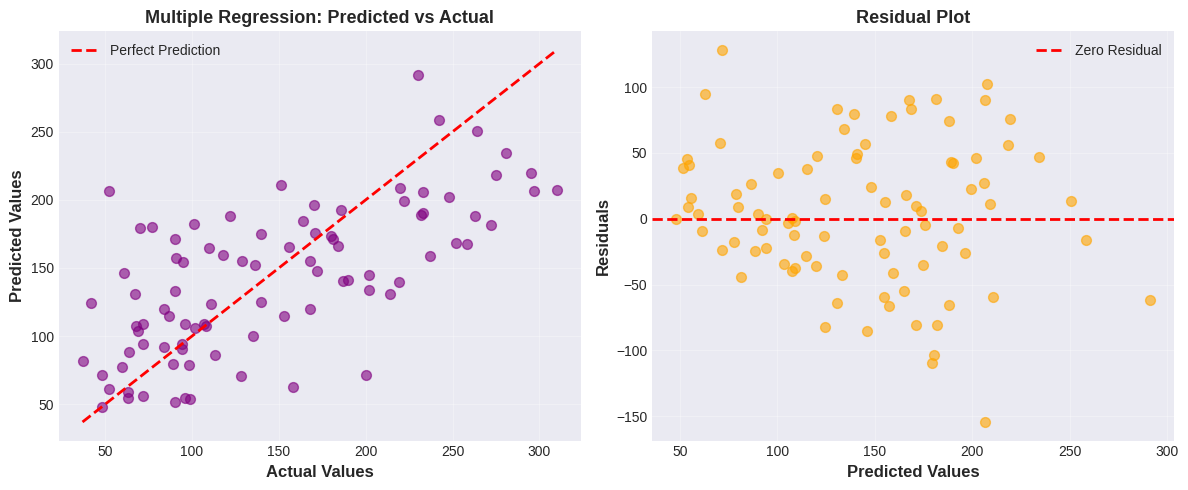


 Multiple Regression performed successfully!


In [3]:
print("\n" + "="*80)
print("MULTIPLE REGRESSION")
print("="*80)

# Use all features for multiple regression
print(f"\nUsing all {X.shape[1]} features:")
print(f"Features: {list(diabetes.feature_names)}")

# Split the data into training and testing sets (80% train, 20% test)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train_multi.shape[0]} samples")
print(f"Testing set size: {X_test_multi.shape[0]} samples")

# Train the Multiple Regression model
lr_multi = LinearRegression()
lr_multi.fit(X_train_multi, y_train_multi)

print("\n✓ Model trained successfully!")

# Make predictions on the test set
y_pred_multi = lr_multi.predict(X_test_multi)

# Calculate evaluation metrics
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("\n" + "-"*80)
print("MULTIPLE REGRESSION RESULTS:")
print("-"*80)
print(f"Mean Absolute Error (MAE):        {mae_multi:.2f}")
print(f"Mean Squared Error (MSE):         {mse_multi:.2f}")
print(f"Root Mean Squared Error (RMSE):   {rmse_multi:.2f}")
print(f"R² Score:                         {r2_multi:.4f}")
print("-"*80)

print(f"\nModel Parameters:")
print(f"   - Intercept: {lr_multi.intercept_:.2f}")
print(f"\n   Feature Coefficients:")

# Display coefficients for each feature
coef_df = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Coefficient': lr_multi.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for idx, row in coef_df.iterrows():
    print(f"      {row['Feature']:8s}: {row['Coefficient']:8.2f}")

# Visualize predicted vs actual values
plt.figure(figsize=(12, 5))

# Subplot 1: Predicted vs Actual scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_multi, y_pred_multi, alpha=0.6, color='purple', s=50)
plt.plot([y_test_multi.min(), y_test_multi.max()],
         [y_test_multi.min(), y_test_multi.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values', fontweight='bold', fontsize=12)
plt.ylabel('Predicted Values', fontweight='bold', fontsize=12)
plt.title('Multiple Regression: Predicted vs Actual', fontweight='bold', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Subplot 2: Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test_multi - y_pred_multi
plt.scatter(y_pred_multi, residuals, alpha=0.6, color='orange', s=50)
plt.axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Residual')
plt.xlabel('Predicted Values', fontweight='bold', fontsize=12)
plt.ylabel('Residuals', fontweight='bold', fontsize=12)
plt.title('Residual Plot', fontweight='bold', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Multiple Regression performed successfully!")
print("="*80)


 POLYNOMIAL REGRESSION

Polynomial Regression extends linear regression by adding polynomial features.
We'll use BMI feature and test different polynomial degrees.

Using BMI feature with training set: 353 samples
Testing set: 89 samples

--------------------------------------------------------------------------------
Training models with different polynomial degrees...
--------------------------------------------------------------------------------

Degree 1:
   - Number of features after transformation: 2
   - MAE: 52.26, MSE: 4061.83, RMSE: 63.73, R²: 0.2334

Degree 2:
   - Number of features after transformation: 3
   - MAE: 52.38, MSE: 4085.03, RMSE: 63.91, R²: 0.2290

Degree 3:
   - Number of features after transformation: 4
   - MAE: 52.18, MSE: 4064.44, RMSE: 63.75, R²: 0.2329

Degree 4:
   - Number of features after transformation: 5
   - MAE: 52.38, MSE: 4226.14, RMSE: 65.01, R²: 0.2023

Degree 5:
   - Number of features after transformation: 6
   - MAE: 51.88, MSE: 4085.85,

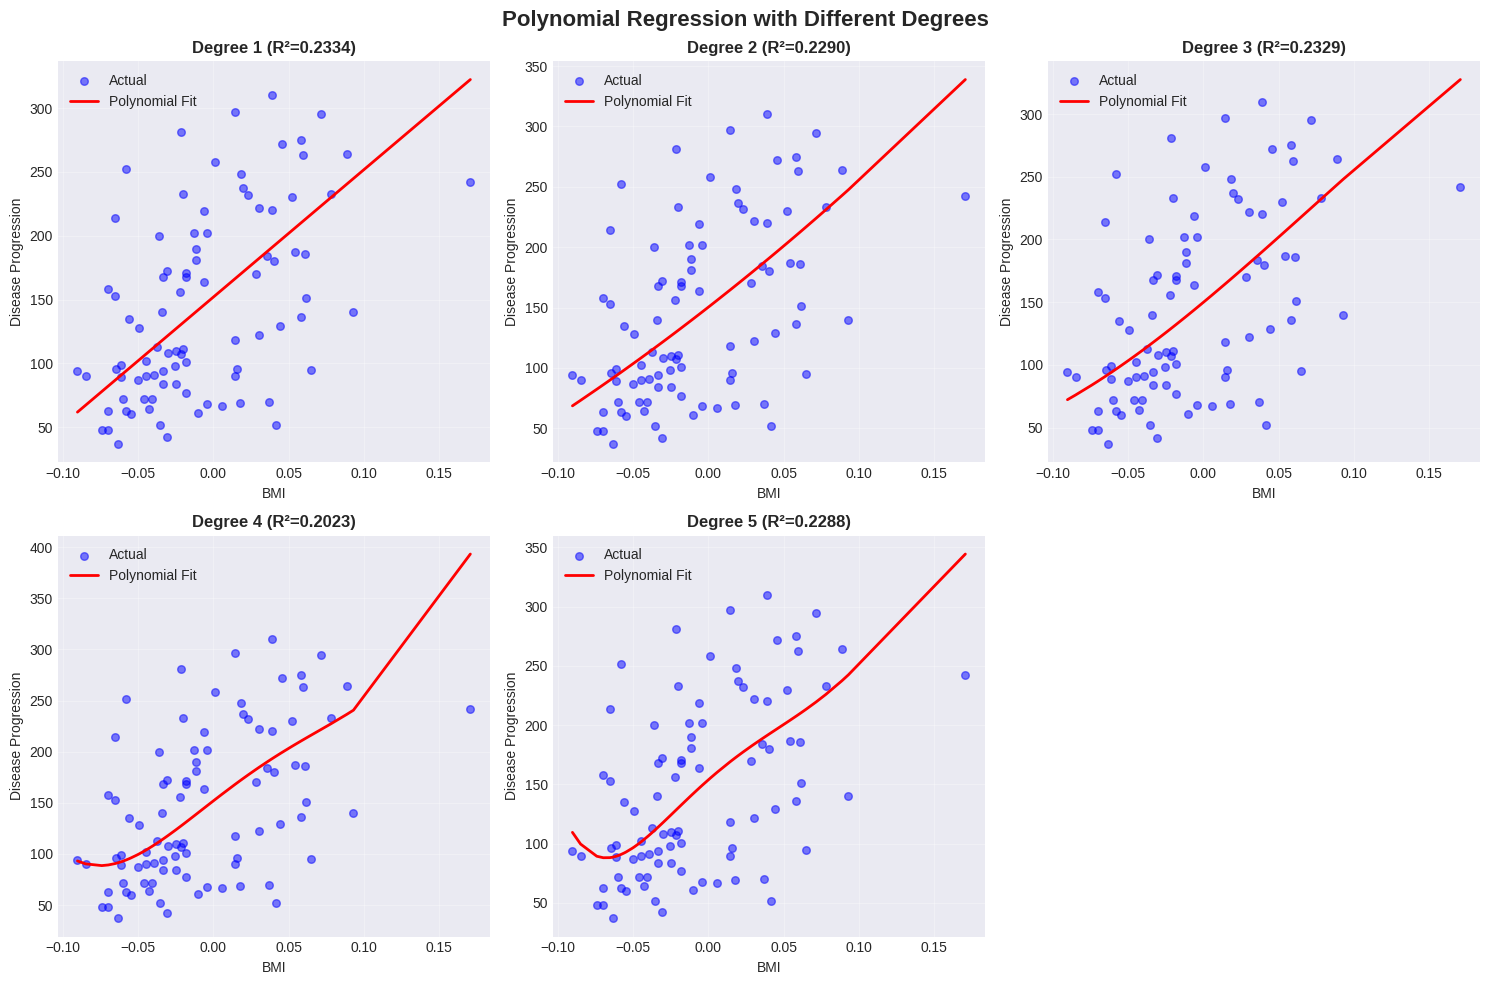

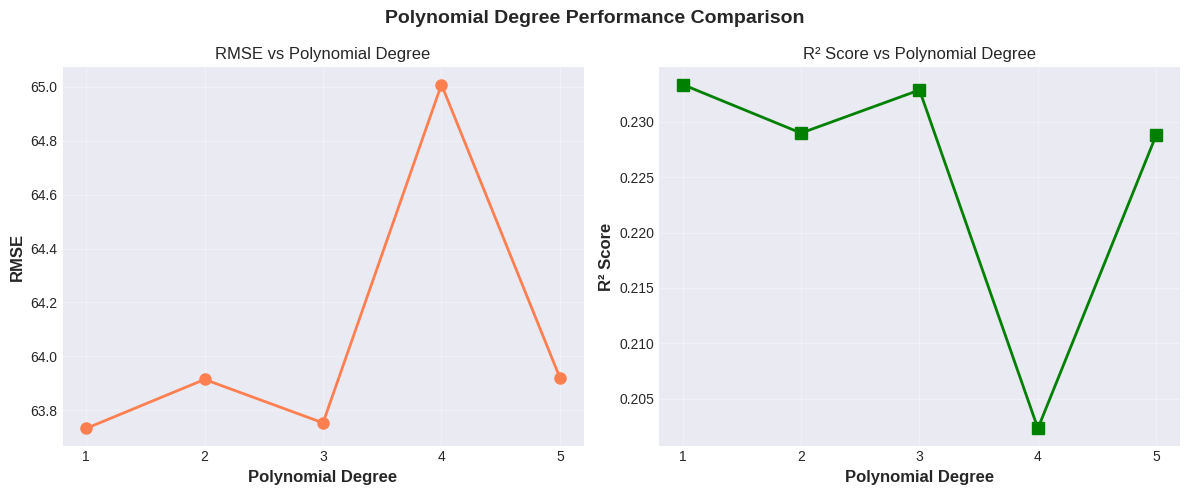


✓  Polynomial Regression performed successfully!


In [4]:
print("\n" + "="*80)
print(" POLYNOMIAL REGRESSION")
print("="*80)

print("\nPolynomial Regression extends linear regression by adding polynomial features.")
print("We'll use BMI feature and test different polynomial degrees.\n")

# Use the same train/test split from Simple Linear Regression
print(f"Using BMI feature with training set: {X_train_simple.shape[0]} samples")
print(f"Testing set: {X_test_simple.shape[0]} samples")

# Test different polynomial degrees
degrees = [1, 2, 3, 4, 5]
results_poly = []

print("\n" + "-"*80)
print("Training models with different polynomial degrees...")
print("-"*80)

for degree in degrees:
    print(f"\nDegree {degree}:")

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train_simple)
    X_poly_test = poly.transform(X_test_simple)

    print(f"   - Number of features after transformation: {X_poly_train.shape[1]}")

    # Train the model
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly_train, y_train)

    # Make predictions
    y_pred_poly = lr_poly.predict(X_poly_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred_poly)
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)

    results_poly.append({
        'Degree': degree,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    })

    print(f"   - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Create results DataFrame
results_poly_df = pd.DataFrame(results_poly)

print("\n" + "="*80)
print("POLYNOMIAL REGRESSION SUMMARY")
print("="*80)
print(results_poly_df.to_string(index=False))
print("="*80)

# Analyze overfitting and underfitting
print("\n Analysis of Polynomial Degrees:")
print("-"*80)
best_idx = results_poly_df['R²'].idxmax()
best_degree = results_poly_df.loc[best_idx, 'Degree']
print(f"✓ Best performing degree: {int(best_degree)} (R² = {results_poly_df.loc[best_idx, 'R²']:.4f})")

if best_degree == 1:
    print("  → Degree 1 is best, suggesting linear relationship is sufficient")
elif best_degree <= 3:
    print(f"  → Degree {int(best_degree)} captures curvature without excessive overfitting")
else:
    print(f"  → Higher degrees may be overfitting the training data")

# Check for signs of overfitting
print("\n  Overfitting/Underfitting Analysis:")
if results_poly_df.loc[0, 'R²'] < 0.1:
    print("  → Degree 1 (linear): Likely underfitting - R² is very low")
else:
    print("  → Degree 1 (linear): Baseline performance")

for i in range(1, len(results_poly_df)):
    r2_improvement = results_poly_df.loc[i, 'R²'] - results_poly_df.loc[i-1, 'R²']
    if r2_improvement > 0.01:
        print(f"  → Degree {results_poly_df.loc[i, 'Degree']}: Improvement (ΔR² = +{r2_improvement:.4f})")
    elif r2_improvement < -0.01:
        print(f"  → Degree {results_poly_df.loc[i, 'Degree']}: Degradation (ΔR² = {r2_improvement:.4f}) - possible overfitting")
    else:
        print(f"  → Degree {results_poly_df.loc[i, 'Degree']}: Minimal change (ΔR² = {r2_improvement:.4f})")

# Visualize polynomial regression results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Polynomial Regression with Different Degrees', fontsize=16, fontweight='bold')

for idx, degree in enumerate(degrees):
    row = idx // 3
    col = idx % 3

    # Transform features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train_simple)
    X_poly_test = poly.transform(X_test_simple)

    # Train model
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly_train, y_train)
    y_pred_poly = lr_poly.predict(X_poly_test)

    # Sort for smooth line plotting
    sort_idx = X_test_simple.flatten().argsort()

    # Plot
    axes[row, col].scatter(X_test_simple, y_test, alpha=0.5, label='Actual', color='blue', s=30)
    axes[row, col].plot(X_test_simple[sort_idx], y_pred_poly[sort_idx],
                        color='red', linewidth=2, label='Polynomial Fit')
    axes[row, col].set_title(f'Degree {degree} (R²={r2_score(y_test, y_pred_poly):.4f})', fontweight='bold')
    axes[row, col].set_xlabel('BMI')
    axes[row, col].set_ylabel('Disease Progression')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Plot metrics comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Polynomial Degree Performance Comparison', fontsize=14, fontweight='bold')

axes[0].plot(results_poly_df['Degree'], results_poly_df['RMSE'],
             marker='o', linewidth=2, markersize=8, color='coral')
axes[0].set_xlabel('Polynomial Degree', fontweight='bold', fontsize=12)
axes[0].set_ylabel('RMSE', fontweight='bold', fontsize=12)
axes[0].set_title('RMSE vs Polynomial Degree')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(degrees)

axes[1].plot(results_poly_df['Degree'], results_poly_df['R²'],
             marker='s', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Polynomial Degree', fontweight='bold', fontsize=12)
axes[1].set_ylabel('R² Score', fontweight='bold', fontsize=12)
axes[1].set_title('R² Score vs Polynomial Degree')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(degrees)

plt.tight_layout()
plt.show()

print("\n  Polynomial Regression performed successfully!")
print("="*80)


 RIDGE AND LASSO REGRESSION

Regularization techniques help prevent overfitting by adding penalties to model complexity.

 Standardizing features for regularization...
✓ Features standardized (mean=0, std=1)

RIDGE REGRESSION (L2 Regularization)

Alpha = 0.001:
   - MAE: 42.79, MSE: 2900.18, RMSE: 53.85, R²: 0.4526

Alpha = 0.01:
   - MAE: 42.79, MSE: 2900.08, RMSE: 53.85, R²: 0.4526

Alpha = 0.1:
   - MAE: 42.80, MSE: 2899.05, RMSE: 53.84, R²: 0.4528

Alpha = 1:
   - MAE: 42.81, MSE: 2892.01, RMSE: 53.78, R²: 0.4541

Alpha = 10:
   - MAE: 42.86, MSE: 2875.78, RMSE: 53.63, R²: 0.4572

Alpha = 100:
   - MAE: 43.25, MSE: 2858.22, RMSE: 53.46, R²: 0.4605

--------------------------------------------------------------------------------
Ridge Regression Summary:
--------------------------------------------------------------------------------
  Alpha       MAE         MSE      RMSE       R²
  0.001 42.794102 2900.181731 53.853335 0.452605
  0.010 42.794171 2900.075130 53.852346 0.452625
  0

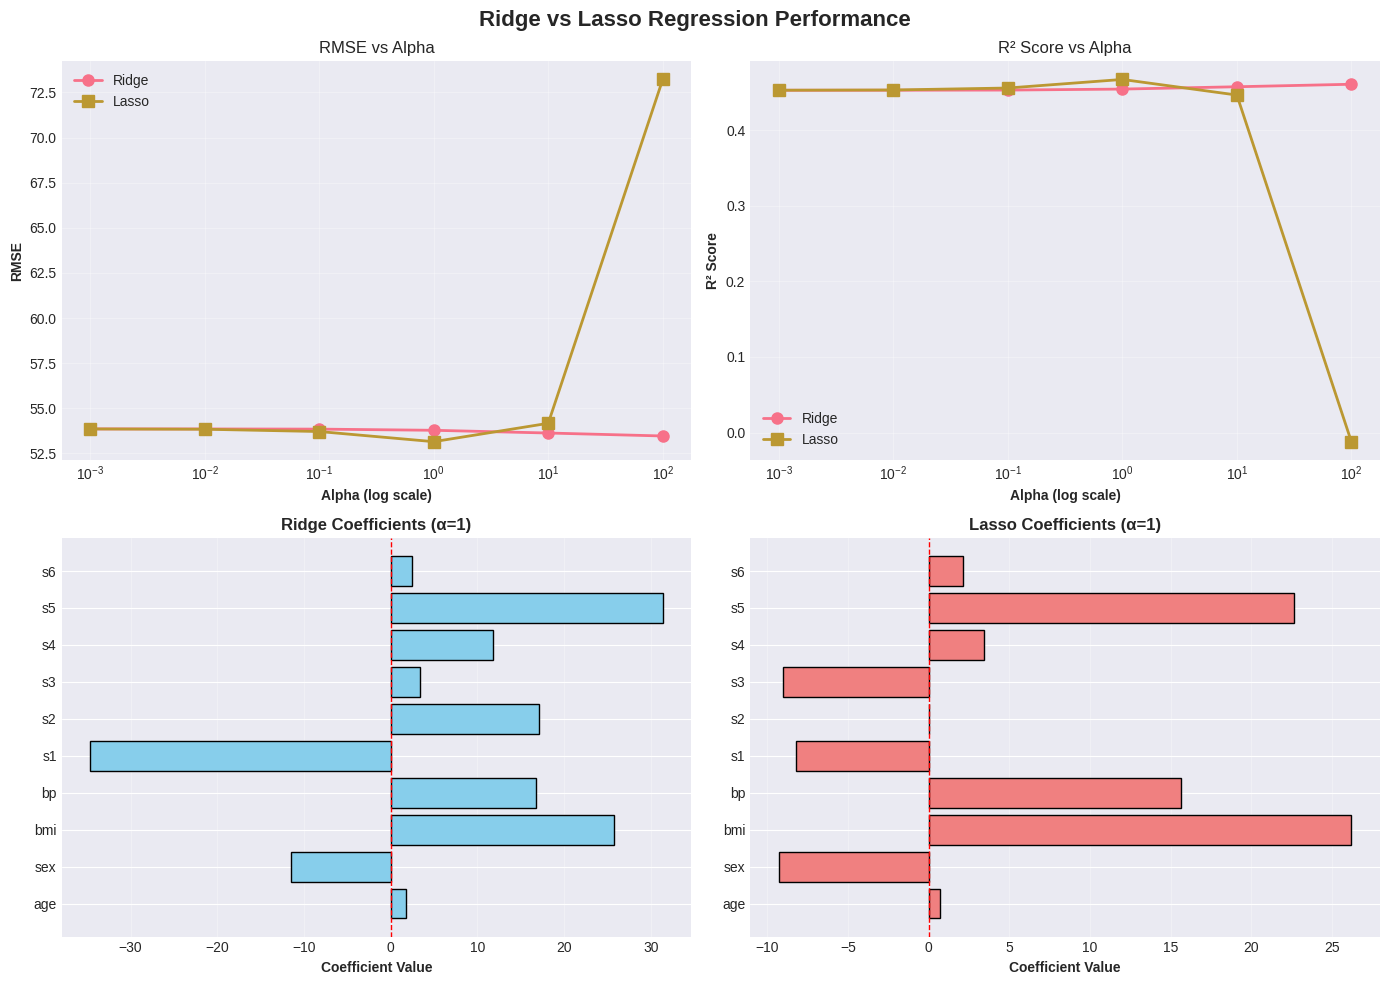

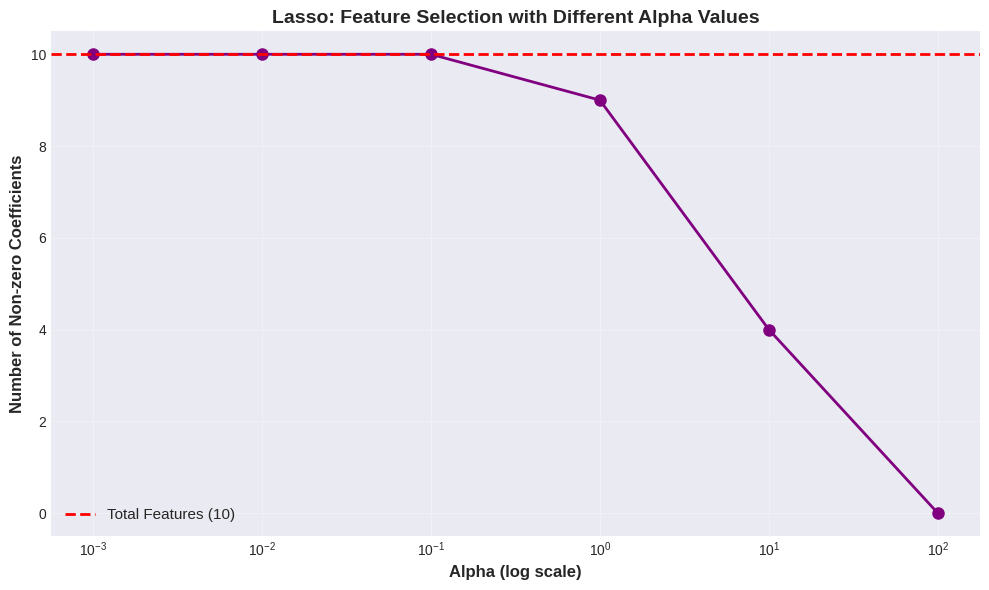

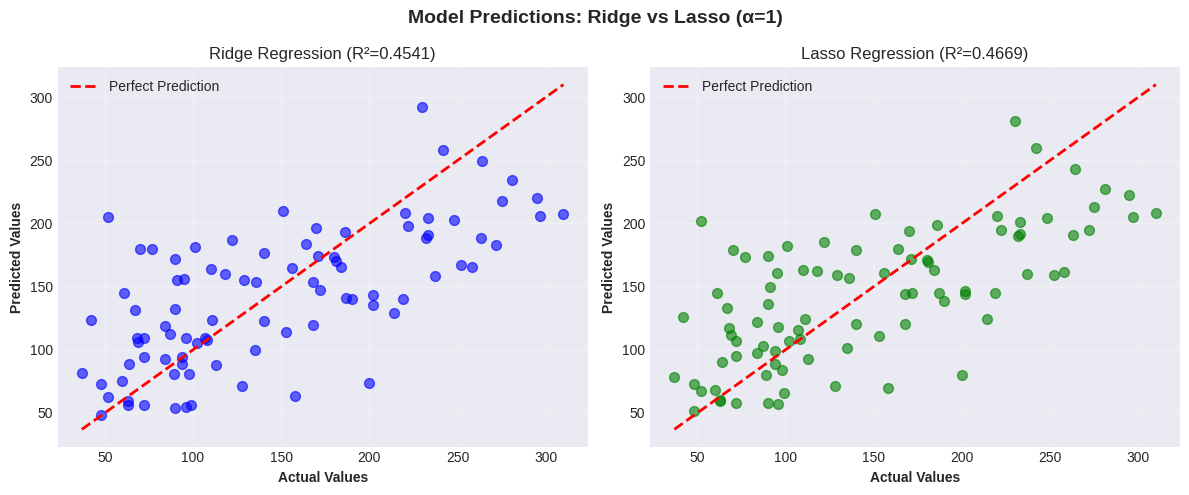


 Ridge and Lasso Regression performed successfully!


In [6]:
print("\n" + "="*80)
print(" RIDGE AND LASSO REGRESSION")
print("="*80)

print("\nRegularization techniques help prevent overfitting by adding penalties to model complexity.")

# Standardize features for regularization (important for Ridge and Lasso)
print("\n Standardizing features for regularization...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)
print("✓ Features standardized (mean=0, std=1)")

# Test different alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

print("\n" + "="*80)
print("RIDGE REGRESSION (L2 Regularization)")
print("="*80)

results_ridge = []

for alpha in alphas:
    print(f"\nAlpha = {alpha}:")

    # Train Ridge model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train_multi)

    # Make predictions
    y_pred_ridge = ridge.predict(X_test_scaled)

    # Calculate metrics
    mae = mean_absolute_error(y_test_multi, y_pred_ridge)
    mse = mean_squared_error(y_test_multi, y_pred_ridge)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_multi, y_pred_ridge)

    results_ridge.append({
        'Alpha': alpha,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    })

    print(f"   - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

results_ridge_df = pd.DataFrame(results_ridge)

print("\n" + "-"*80)
print("Ridge Regression Summary:")
print("-"*80)
print(results_ridge_df.to_string(index=False))

print("\n" + "="*80)
print("LASSO REGRESSION (L1 Regularization)")
print("="*80)

results_lasso = []

for alpha in alphas:
    print(f"\nAlpha = {alpha}:")

    # Train Lasso model
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train_multi)

    # Make predictions
    y_pred_lasso = lasso.predict(X_test_scaled)

    # Calculate metrics
    mae = mean_absolute_error(y_test_multi, y_pred_lasso)
    mse = mean_squared_error(y_test_multi, y_pred_lasso)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_multi, y_pred_lasso)

    # Count non-zero coefficients (feature selection)
    non_zero = np.sum(lasso.coef_ != 0)

    results_lasso.append({
        'Alpha': alpha,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Non-zero Coefs': non_zero
    })

    print(f"   - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")
    print(f"   - Active features: {non_zero}/{len(diabetes.feature_names)}")

results_lasso_df = pd.DataFrame(results_lasso)

print("\n" + "-"*80)
print("Lasso Regression Summary:")
print("-"*80)
print(results_lasso_df.to_string(index=False))

# Explain regularization parameter influence
print("\n" + "="*80)
print(" HOW ALPHA (REGULARIZATION PARAMETER) INFLUENCES THE MODEL")
print("="*80)


# Analyze best alpha for each method
best_ridge_idx = results_ridge_df['R²'].idxmax()
best_lasso_idx = results_lasso_df['R²'].idxmax()

print("\n" + "-"*80)
print(f" Best Ridge Alpha: {results_ridge_df.loc[best_ridge_idx, 'Alpha']} (R² = {results_ridge_df.loc[best_ridge_idx, 'R²']:.4f})")
print(f" Best Lasso Alpha: {results_lasso_df.loc[best_lasso_idx, 'Alpha']} (R² = {results_lasso_df.loc[best_lasso_idx, 'R²']:.4f})")
print("-"*80)

# Visualize Ridge vs Lasso performance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Ridge vs Lasso Regression Performance', fontsize=16, fontweight='bold')

# RMSE comparison
axes[0, 0].plot(results_ridge_df['Alpha'], results_ridge_df['RMSE'],
                marker='o', label='Ridge', linewidth=2, markersize=8)
axes[0, 0].plot(results_lasso_df['Alpha'], results_lasso_df['RMSE'],
                marker='s', label='Lasso', linewidth=2, markersize=8)
axes[0, 0].set_xscale('log')
axes[0, 0].set_xlabel('Alpha (log scale)', fontweight='bold')
axes[0, 0].set_ylabel('RMSE', fontweight='bold')
axes[0, 0].set_title('RMSE vs Alpha')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# R² comparison
axes[0, 1].plot(results_ridge_df['Alpha'], results_ridge_df['R²'],
                marker='o', label='Ridge', linewidth=2, markersize=8)
axes[0, 1].plot(results_lasso_df['Alpha'], results_lasso_df['R²'],
                marker='s', label='Lasso', linewidth=2, markersize=8)
axes[0, 1].set_xscale('log')
axes[0, 1].set_xlabel('Alpha (log scale)', fontweight='bold')
axes[0, 1].set_ylabel('R² Score', fontweight='bold')
axes[0, 1].set_title('R² Score vs Alpha')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Feature coefficients for Ridge (alpha=1)
ridge_best = Ridge(alpha=1)
ridge_best.fit(X_train_scaled, y_train_multi)
axes[1, 0].barh(diabetes.feature_names, ridge_best.coef_, color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Coefficient Value', fontweight='bold')
axes[1, 0].set_title('Ridge Coefficients (α=1)', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=1)

# Feature coefficients for Lasso (alpha=1)
lasso_best = Lasso(alpha=1, max_iter=10000)
lasso_best.fit(X_train_scaled, y_train_multi)
colors = ['lightcoral' if c != 0 else 'lightgray' for c in lasso_best.coef_]
axes[1, 1].barh(diabetes.feature_names, lasso_best.coef_, color=colors, edgecolor='black')
axes[1, 1].set_xlabel('Coefficient Value', fontweight='bold')
axes[1, 1].set_title('Lasso Coefficients (α=1)', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

# Lasso feature selection visualization
plt.figure(figsize=(10, 6))
plt.plot(results_lasso_df['Alpha'], results_lasso_df['Non-zero Coefs'],
         marker='o', linewidth=2, markersize=8, color='purple')
plt.axhline(y=len(diabetes.feature_names), color='r', linestyle='--',
            label=f'Total Features ({len(diabetes.feature_names)})', linewidth=2)
plt.xscale('log')
plt.xlabel('Alpha (log scale)', fontweight='bold', fontsize=12)
plt.ylabel('Number of Non-zero Coefficients', fontweight='bold', fontsize=12)
plt.title('Lasso: Feature Selection with Different Alpha Values', fontweight='bold', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Compare predictions for Ridge and Lasso with alpha=1
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train_multi)
y_pred_ridge_best = ridge_model.predict(X_test_scaled)

lasso_model = Lasso(alpha=1, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train_multi)
y_pred_lasso_best = lasso_model.predict(X_test_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Model Predictions: Ridge vs Lasso (α=1)', fontsize=14, fontweight='bold')

# Ridge predictions
axes[0].scatter(y_test_multi, y_pred_ridge_best, alpha=0.6, color='blue', s=50)
axes[0].plot([y_test_multi.min(), y_test_multi.max()],
             [y_test_multi.min(), y_test_multi.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values', fontweight='bold')
axes[0].set_ylabel('Predicted Values', fontweight='bold')
axes[0].set_title(f'Ridge Regression (R²={r2_score(y_test_multi, y_pred_ridge_best):.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Lasso predictions
axes[1].scatter(y_test_multi, y_pred_lasso_best, alpha=0.6, color='green', s=50)
axes[1].plot([y_test_multi.min(), y_test_multi.max()],
             [y_test_multi.min(), y_test_multi.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values', fontweight='bold')
axes[1].set_ylabel('Predicted Values', fontweight='bold')
axes[1].set_title(f'Lasso Regression (R²={r2_score(y_test_multi, y_pred_lasso_best):.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Ridge and Lasso Regression performed successfully!")
print("="*80)


 MODEL COMPARISON AND ANALYSIS

COMPREHENSIVE MODEL COMPARISON
                Model       MAE         MSE      RMSE       R²
        Simple Linear 52.259976 4061.825928 63.732456 0.233350
      Multiple Linear 42.794095 2900.193628 53.853446 0.452603
Polynomial (Degree 2) 52.383912 4085.025481 63.914204 0.228972
Polynomial (Degree 3) 52.181400 4064.443384 63.752987 0.232856
          Ridge (α=1) 42.811999 2892.014566 53.777454 0.454147
          Lasso (α=1) 42.802984 2824.568094 53.146666 0.466877

 Best Performing Model: Lasso (α=1)
   R² Score: 0.4669
   RMSE: 53.15
   MAE: 42.80


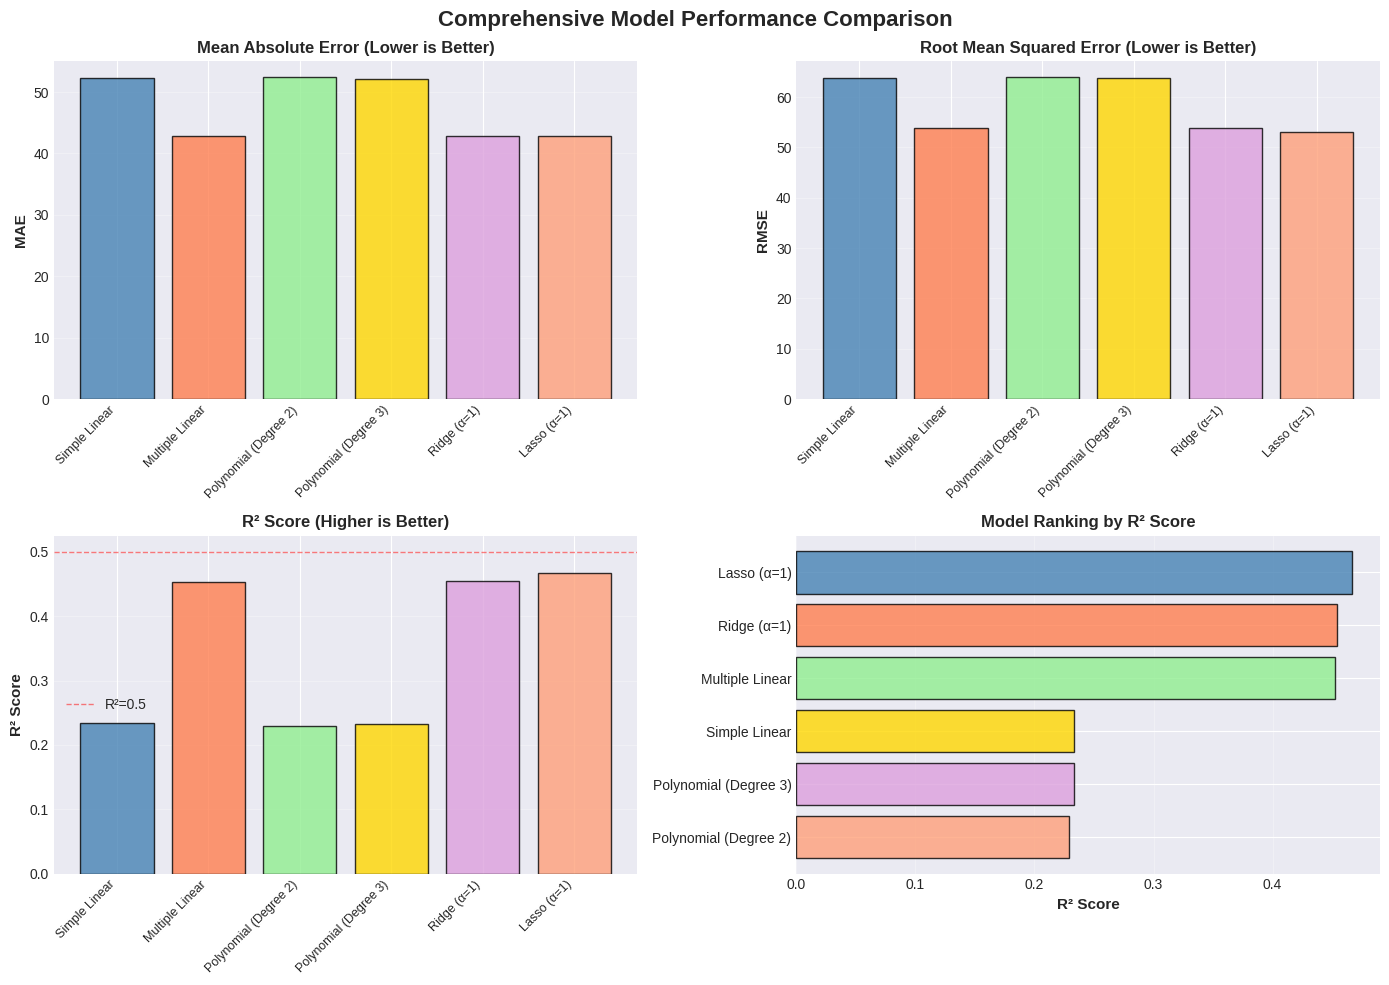


KEY OBSERVATIONS AND INSIGHTS

  MODEL PERFORMANCE SUMMARY:
--------------------------------------------------------------------------------

   Simple Linear Regression (R² = 0.2334):
      • Moderate performance with single feature
      • Shows some relationship but limited predictive power

   Multiple Linear Regression (R² = 0.4526):
      • Significant improvement over simple linear regression
      • R² increased by 0.2193
      • Multiple features capture more variance in target

   Polynomial Regression:
      • Degree 2 (R² = 0.2290): Similar to linear model
      • Degree 3 (R² = 0.2329): Further improvement (0.0039)

   Ridge Regression (α=1, R² = 0.4541):
      • Performance similar to standard multiple regression
      • Regularization provides stability without sacrificing accuracy

   Lasso Regression (α=1, R² = 0.4669):
      • Active features: 9.0/10
      • Eliminated 1.0 less important features
      • Provides simpler, more interpretable model
      • Outperforms 

In [7]:
print("\n" + "="*80)
print(" MODEL COMPARISON AND ANALYSIS")
print("="*80)



# Get polynomial degree 2 and 3 results
poly_2 = results_poly_df[results_poly_df['Degree'] == 2].iloc[0]
poly_3 = results_poly_df[results_poly_df['Degree'] == 3].iloc[0]

# Get best Ridge and Lasso results (alpha=1 as moderate regularization)
ridge_result = results_ridge_df[results_ridge_df['Alpha'] == 1].iloc[0]
lasso_result = results_lasso_df[results_lasso_df['Alpha'] == 1].iloc[0]

# Create comprehensive comparison table
comparison_data = {
    'Model': [
        'Simple Linear',
        'Multiple Linear',
        'Polynomial (Degree 2)',
        'Polynomial (Degree 3)',
        'Ridge (α=1)',
        'Lasso (α=1)'
    ],
    'MAE': [
        mae_simple,
        mae_multi,
        poly_2['MAE'],
        poly_3['MAE'],
        ridge_result['MAE'],
        lasso_result['MAE']
    ],
    'MSE': [
        mse_simple,
        mse_multi,
        poly_2['MSE'],
        poly_3['MSE'],
        ridge_result['MSE'],
        lasso_result['MSE']
    ],
    'RMSE': [
        rmse_simple,
        rmse_multi,
        poly_2['RMSE'],
        poly_3['RMSE'],
        ridge_result['RMSE'],
        lasso_result['RMSE']
    ],
    'R²': [
        r2_simple,
        r2_multi,
        poly_2['R²'],
        poly_3['R²'],
        ridge_result['R²'],
        lasso_result['R²']
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

# Identify best performing model
best_model_idx = comparison_df['R²'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_r2 = comparison_df.loc[best_model_idx, 'R²']

print(f"\n Best Performing Model: {best_model}")
print(f"   R² Score: {best_r2:.4f}")
print(f"   RMSE: {comparison_df.loc[best_model_idx, 'RMSE']:.2f}")
print(f"   MAE: {comparison_df.loc[best_model_idx, 'MAE']:.2f}")

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comprehensive Model Performance Comparison', fontsize=16, fontweight='bold')

x_pos = np.arange(len(comparison_df))
colors = ['steelblue', 'coral', 'lightgreen', 'gold', 'plum', 'lightsalmon']

# MAE comparison
axes[0, 0].bar(x_pos, comparison_df['MAE'], color=colors, alpha=0.8, edgecolor='black')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right', fontsize=9)
axes[0, 0].set_ylabel('MAE', fontweight='bold', fontsize=11)
axes[0, 0].set_title('Mean Absolute Error (Lower is Better)', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# RMSE comparison
axes[0, 1].bar(x_pos, comparison_df['RMSE'], color=colors, alpha=0.8, edgecolor='black')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right', fontsize=9)
axes[0, 1].set_ylabel('RMSE', fontweight='bold', fontsize=11)
axes[0, 1].set_title('Root Mean Squared Error (Lower is Better)', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# R² comparison
axes[1, 0].bar(x_pos, comparison_df['R²'], color=colors, alpha=0.8, edgecolor='black')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right', fontsize=9)
axes[1, 0].set_ylabel('R² Score', fontweight='bold', fontsize=11)
axes[1, 0].set_title('R² Score (Higher is Better)', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].axhline(y=0.5, color='red', linestyle='--', linewidth=1, alpha=0.5, label='R²=0.5')
axes[1, 0].legend()

# Performance ranking
performance_rank = comparison_df.sort_values('R²', ascending=False).reset_index(drop=True)
axes[1, 1].barh(performance_rank['Model'], performance_rank['R²'],
                color=colors, alpha=0.8, edgecolor='black')
axes[1, 1].set_xlabel('R² Score', fontweight='bold', fontsize=11)
axes[1, 1].set_title('Model Ranking by R² Score', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Detailed analysis and observations
print("\n" + "="*80)
print("KEY OBSERVATIONS AND INSIGHTS")
print("="*80)

print("\n  MODEL PERFORMANCE SUMMARY:")
print("-"*80)

# Simple Linear Regression
print(f"\n   Simple Linear Regression (R² = {r2_simple:.4f}):")
if r2_simple < 0.1:
    print("      • Poor performance - single feature (BMI) insufficient")
    print("      • Cannot capture complexity of disease progression")
    print("      • Baseline model showing need for multiple predictors")
else:
    print("      • Moderate performance with single feature")
    print("      • Shows some relationship but limited predictive power")

# Multiple Linear Regression
print(f"\n   Multiple Linear Regression (R² = {r2_multi:.4f}):")
if r2_multi > r2_simple + 0.2:
    print("      • Significant improvement over simple linear regression")
    print(f"      • R² increased by {(r2_multi - r2_simple):.4f}")
    print("      • Multiple features capture more variance in target")
else:
    print("      • Uses all available features")
    print("      • Provides baseline for regularization comparison")

# Polynomial Regression
print(f"\n   Polynomial Regression:")
print(f"      • Degree 2 (R² = {poly_2['R²']:.4f}): ", end="")
if poly_2['R²'] > r2_simple:
    print(f"Improvement over linear ({poly_2['R²'] - r2_simple:.4f})")
else:
    print("Similar to linear model")

print(f"      • Degree 3 (R² = {poly_3['R²']:.4f}): ", end="")
if poly_3['R²'] > poly_2['R²']:
    print(f"Further improvement ({poly_3['R²'] - poly_2['R²']:.4f})")
elif poly_3['R²'] < poly_2['R²']:
    print("⚠ Degradation - possible overfitting")
else:
    print("Minimal change from degree 2")

# Ridge Regression
print(f"\n   Ridge Regression (α=1, R² = {ridge_result['R²']:.4f}):")
if abs(ridge_result['R²'] - r2_multi) < 0.01:
    print("      • Performance similar to standard multiple regression")
    print("      • Regularization provides stability without sacrificing accuracy")
elif ridge_result['R²'] > r2_multi:
    print("      • Slight improvement over standard regression")
    print("      • Regularization helps prevent overfitting")
else:
    print("      • Slight decrease from standard regression")
    print("      • Trade-off: reduced overfitting for slight accuracy loss")

# Lasso Regression
print(f"\n   Lasso Regression (α=1, R² = {lasso_result['R²']:.4f}):")
lasso_active = lasso_result['Non-zero Coefs']
print(f"      • Active features: {lasso_active}/{len(diabetes.feature_names)}")
if lasso_active < len(diabetes.feature_names):
    print(f"      • Eliminated {len(diabetes.feature_names) - lasso_active} less important features")
    print("      • Provides simpler, more interpretable model")
if abs(lasso_result['R²'] - ridge_result['R²']) < 0.01:
    print("      • Performance comparable to Ridge regression")
elif lasso_result['R²'] > ridge_result['R²']:
    print("      • Outperforms Ridge through feature selection")
else:
    print("      • Slightly lower performance than Ridge")

print("\n  OVERFITTING ANALYSIS:")
print("-"*80)

# Check for overfitting indicators
if max(results_poly_df['R²']) > r2_multi + 0.05:
    print("\n   Polynomial Models:")
    print("      • Higher degree polynomials show increased R² on test set")
    print("      • However, this is on single feature - limited overfitting risk")
else:
    print("\n   Polynomial Models:")
    print("      • No significant overfitting observed")
    print("      • Performance gains plateau with higher degrees")

print("\n   Regularization Models:")
if abs(ridge_result['R²'] - r2_multi) < 0.02 and abs(lasso_result['R²'] - r2_multi) < 0.02:
    print("      • Ridge and Lasso perform similarly to standard regression")
    print("      • Suggests dataset not heavily affected by overfitting")
    print("      • Regularization provides insurance against overfitting")
else:
    print("      • Regularization shows measurable impact")
    print("      • Helps balance model complexity and generalization")

print("\n️  INSIGHTS ABOUT THE DIABETES DATASET:")
print("-"*80)

print(f"\n   Overall Predictability (Best R² = {best_r2:.4f}):")
if best_r2 < 0.3:
    print("      • Low predictability - features explain limited variance")
    print("      • Suggests other factors affect disease progression")
elif best_r2 < 0.6:
    print("      • Moderate predictability - features capture important patterns")
    print("      • Substantial unexplained variance remains")
    print("      • Disease progression influenced by unmeasured factors")
else:
    print("      • High predictability - features strongly predict outcome")
    print("      • Model captures most variance in disease progression")

print("\n   Feature Importance:")
print("      • Multiple features needed for good predictions")
print("      • Single feature (BMI) insufficient for accurate modeling")
if lasso_active < len(diabetes.feature_names):
    print(f"      • Lasso identifies {lasso_active} most important features")
    print("      • Some features may be redundant or less informative")

print("\n   Model Complexity:")
print("      • Linear models perform reasonably well")
print("      • Complex polynomial features provide limited benefit")
print("      • Suggests relationship is relatively linear")

print("\n  RECOMMENDATIONS:")
print("-"*80)

print("\n   Best Model Choice:")
if best_model in ['Ridge (α=1)', 'Lasso (α=1)']:
    print(f"      • {best_model} recommended for deployment")
    print("      • Provides regularization against overfitting")
    if 'Lasso' in best_model:
        print("      • Offers simpler model through feature selection")
        print("      • Easier to interpret and implement")
elif best_model == 'Multiple Linear':
    print("      • Multiple Linear Regression is sufficient")
    print("      • Consider Ridge/Lasso for production robustness")
else:
    print(f"      • {best_model} shows best performance")
    print("      • Validate on additional data before deployment")

print(f"\n Best Model: {best_model} with R² = {best_r2:.4f}")
